## K-Means Clustering

### An Unsupervised Learning Algorithm

<center><img src="k-means-graph.gif" width="350" /></center>

### Unspervised Learning
Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data, meaning that the data does not have explicit target labels or outputs associated with it. In unsupervised learning, the goal is to explore the inherent patterns, relationships, and structures within the data without the guidance of labeled examples.

## Explanation

K-Means aims to minimize the sum of squared distances between data points and their assigned centroids within a cluster. It's an iterative process that refines the clusters in each iteration to create more compact and cohesive groups of data points.

- Watch: [Computerphile - K-Means Algorithm](https://www.youtube.com/watch?v=yR7k19YBqiw)


### Step by Step

1. Choose 'k' (number of clusters) as 3.

2. Randomly initialize three centroids.

3. Assign each data point to the closest centroid.

4. Calculate the new centroids based on the assigned data points.

5. Repeat the assignment and centroid update steps for a few iterations until convergence.

6. Once the algorithm converges, you'll have three clusters with customer data points grouped together.

In [7]:
# importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as am
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

In [8]:
# Graph setup
%matplotlib inline #enables the inline plotting
rcParams['figure.figsize'] = 7,4 #sets the default graph size

UsageError: unrecognized arguments: #enables the inline plotting


UsageError: unrecognized arguments: #enables the inline plotting

In [3]:
# We will use the scikit built-in dataset 'Iris' - https://en.wikipedia.org/wiki/Iris_flower_data_set
iris = datasets.load_iris() #loading the iris data set from the scikit built-in datasets

X = scale(iris.data) #scale the information of the dataset

y = pd.DataFrame(iris.target) #creates a dataframe to hold the targeted values
variable_names = iris.feature_names
X[0:10,] #prints the first 10 rows of the scales features from the function "x"

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

## Build and run the model

In [4]:
# to suppress memory leak warning:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [5]:
# initialising the cluster model
clustering = KMeans(n_clusters=3, random_state=5, n_init=10) # sets the number of centroids(n_clusters) and randomizes the position of the centroid
clustering.fit(X) #fits the clustering model to the scaled features of "x" from above

## Plotting the model outputs

In [6]:
iris_df = pd.DataFrame(iris.data) #create the dataframe "iris_df" from the Iris dataset features
iris_df.columns = ["sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width"] #rename the columns in "iris_df"
y.columns = ["Targets"] #rename the columns of the targeted dataset "y"

Text(0.5, 1.0, 'K-Means Classification')

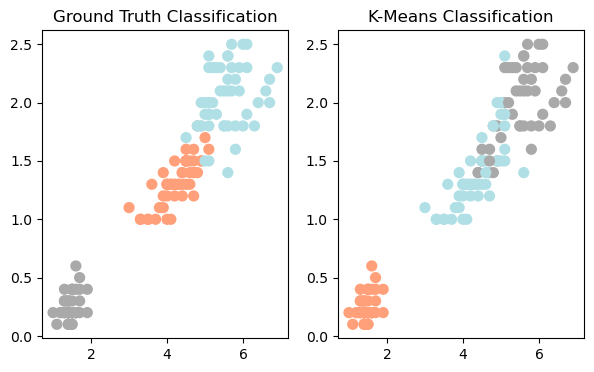

In [7]:
color_theme = np.array(["darkgray", "lightsalmon", "powderblue"]) #defining the colour theme for the data plotting

plt.subplot(1,2,1) #create a subplot of a 1x2 grid

# Petal_Length along the x-axis and Petal_Width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification") #sets the title for the subplot

plt.subplot(1,2,2) #creating another subplot 
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50) #scatter plot using KMeans classification
plt.title("K-Means Classification") #sets the title for the subplot

Text(0.5, 1.0, 'K-Means Classification')

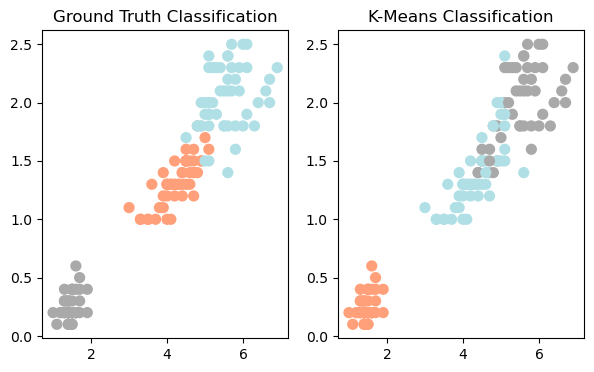

In [8]:
#relabeling intended targ
relabel = np.choose(clustering.labels_, [2,0,1]).astype(np.int64)

plt.subplot(1,2,1)

# Petal_Length along the x-axis and Petal_Width along the y-axis
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[iris.target], s=50)
plt.title("Ground Truth Classification")

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Petal_Length, y=iris_df.Petal_Width, c=color_theme[clustering.labels_], s=50)
plt.title("K-Means Classification")

## Evaluate the Clustering Results

In [9]:
print(classification_report(y, relabel)) #creates, and prints a classification report that compares the original class labels, with the relabeled targets

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



## Interpreting the Results

<img src="K_means_results.png" />

### References

- [K-Means Clustering - Methods using Scikit-learn in Python - Tutorial 23 in Jupyter Notebook](https://www.youtube.com/watch?v=ikt0sny_ImY&t=603s) 
